In [1]:
pip install plotly

In [1]:
import librosa
import music21  # yes! new favorite library
import numpy as np
from scipy.fft import fft, fftfreq, rfft, rfftfreq

from IPython.display import Audio
import plotly.express as px
import matplotlib.pyplot as plt


In [2]:
AUDIO = "D:\\Github\\Music-Rec-RAC-DataSci\\org song\\วงวน - SERIOUS BACON ( ORIGINAL by ONEONE )\\vocals.mp3"

y, sr = librosa.load(AUDIO)
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env)
timestamps = librosa.frames_to_time(onset_frames, sr=sr)

In [3]:
onset_env

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [4]:
def freq(file=None, sr=None, data=None, start_time=None, end_time=None):

    if file is not None:
        sr, data = wavfile.read(file) 
    if data.ndim > 1:
        data = data[:, 0]
    else:
        pass

    dataToRead = data[int(start_time * sr / 1000) : int(end_time * sr / 1000) + 1]

    N = len(dataToRead)
    yf = rfft(dataToRead)
    xf = rfftfreq(N, 1 / sr)


    idx = np.argmax(np.abs(yf))
    freq = xf[idx]
    return freq

In [5]:
# print("onset_env", onset_env)
print("onset_frames",onset_frames)
print("timestamps",timestamps)

onset_frames [  233   253   268   283   381   393   400   415   436   454   485   509
   517   545   692   704   723   735   750   767   849   865   906   922
   928   955   959   983   989  1013  1018  1145  1157  1163  1172  1194
  1205  1221  1236  1394  1398  1409  1412  1429  1440  1443  1456  1465
  1471  1489  1507  1640  1646  1663  1676  1692  1702  1707  1728  1751
  1789  1793  1799  1808  1824  1845  1865  1868  1929  2098  2131  2143
  2147  2162  2177  2203  2218  2236  2279  2338  2367  2379  2382  2397
  2454  2457  2498  2513  2542  2574  2584  2603  2629  2632  2679  2689
  2704  2720  2732  2749  2766  2795  2805  2808  2835  2848  2851  2877
  2906  2925  2940  2980  3027  3041  3043  3056  3072  3084  3099  3112
  3145  3157  3161  3190  3219  3292  3306  3318  3335  3394  3412  3423
  3436  3453  3481  3502  3512  3525  3540  3543  3569  3619  3629  3645
  3656  3684  3690  3704  3732  3737  3748  3762  3775  3791  3804  3820
  3830  3981  3992  3996  4012  4035  

In [6]:
data = y.copy()
start_time = 5.41024943
end_time = 5.87464853

# start_time = 5
# end_time = 10

# start_time = 5.87464853 
# end_time = 6.22294785

start_frame = librosa.time_to_frames(start_time, sr=sr)
end_frame = librosa.time_to_frames(end_time, sr=sr)

onset_frame = onset_frames[np.where((onset_frames >= start_frame) & (onset_frames <= end_frame))]

print(onset_frame)

# dataToRead = data[int(start_time * sr / 1000) : int(end_time * sr / 1000) + 1]
dataToRead = data[int(start_time * sr) : int(end_time * sr) + 1]

# dataToRead = data


Audio(data=dataToRead, rate=sr)

N = len(dataToRead)
yf = rfft(dataToRead)
xf = rfftfreq(N, 1 / sr)

idx = np.argmax(np.abs(yf))
freq = xf[idx]

[233 253]


In [7]:
data = y.copy()
start_frame = 253
end_frame = 268

start_time = librosa.frames_to_time(start_frame, sr=sr)
end_time = librosa.frames_to_time(end_frame, sr=sr)

# start_frame = 5.87464853 
# end_frame = 6.22294785

# dataToRead = data[int(start_frame * sr / 1000) : int(end_frame * sr / 1000) + 1]
dataToRead = data[int(start_time * sr) : int(end_time * sr) + 1]


Audio(data=dataToRead, rate=sr)

# N = len(dataToRead)
# yf = rfft(dataToRead)
# xf = rfftfreq(N, 1 / sr)

# idx = np.argmax(np.abs(yf))
# freq = xf[idx]

In [8]:
print(start_time,end_time)

5.874648526077097 6.222947845804988


In [9]:
sr

22050

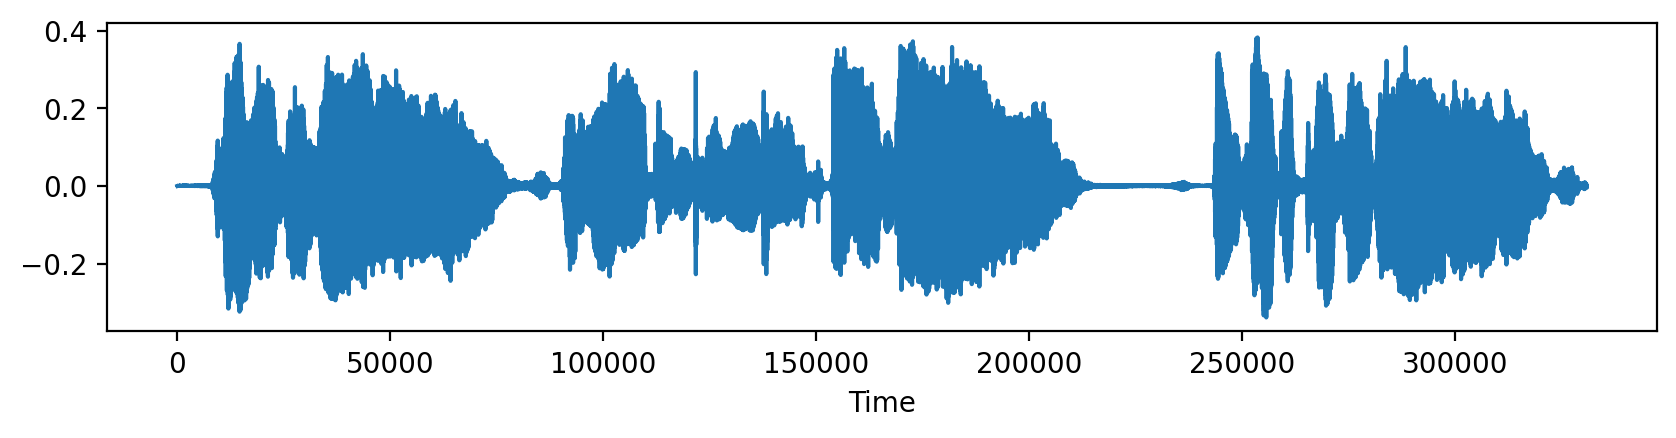

In [10]:
plt.figure(figsize=(10, 2))
plt.plot(y[22050*5:22050*20])
plt.xlabel('Time')
# plt.ylabel('Magnitude')
plt.show()

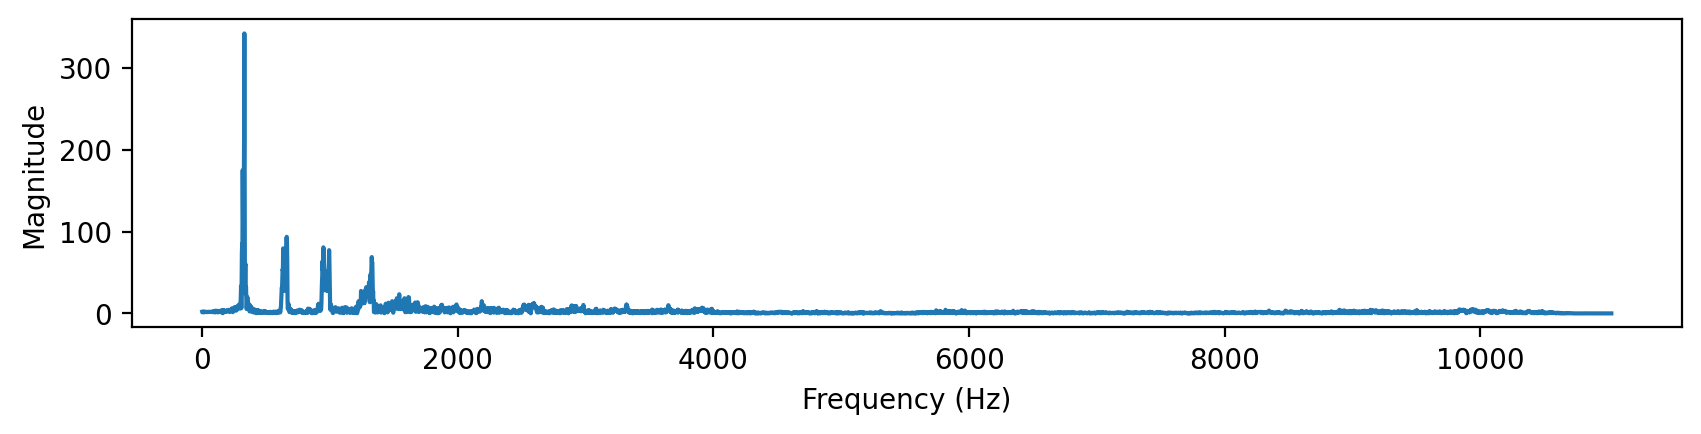

In [11]:
plt.figure(figsize=(10, 2))
plt.plot(xf, np.abs(yf))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [12]:
print(N)
print(yf)
print(xf)

print(idx)
print(freq)

10242
[-2.1916072 +0.0000000e+00j -2.278815  +2.0917080e-01j
 -1.498079  +3.7963748e-01j ...  0.05702056-4.1328414e-04j
  0.05702155-2.0780822e-04j  0.05702102+0.0000000e+00j]
[0.00000000e+00 2.15289982e+00 4.30579965e+00 ... 1.10206942e+04
 1.10228471e+04 1.10250000e+04]
153
329.39367311072056


In [13]:
len(y)

6194304

In [14]:
sr

22050